# Building out Linear Regression Algorithm Loosely Based around the following Psuedo Code


* Read in lots of data from the markets - 6hr, 12hr, 24hr Ideally
* Create two arrays, One Array has an (Low Price, Volume) and the second (High Price) - Maybe
* Pass this into a Linear Regression Algorithm.
* Returns the next High price prediction point.
* Check this is at least 80% accurate
* Check if this prediction is above or below current price on market.
* Trade accordingly, Buy or Sell.
* Check the price continuously until in profit. - Maybe
* Trade either hits Limit Distance OR predefined limit. - ?
* Close trade - Sell or Buy
* Loop round again. - Need to figure out a time period for this. Maybe based around the data?

In [184]:
import numpy as np
import pandas as pd
import quandl as qdl
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
#Getting Data
import requests
import json
from pandas.io.json import json_normalize 
import seaborn as sns

In [72]:
ETH_4h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=ETH&tsym=USD&limit=120&aggregate=4&e=CCCAGG'
ETH_4h_response = requests.get(ETH_4h_url)
if (ETH_4h_response.status_code == 200):
    ETH_4h = (ETH_4h_response.json())
    
ETH_4h = json_normalize(ETH_4h['Data'])
ETH_4h['time'] = pd.to_datetime(ETH_4h['time'], unit='s')
ETH_4h_noIdenx = ETH_4h.set_index('time')
ETH_4h.head()

,close,high,low,open,time,volumefrom,volumeto
0,1234.63,1287.06,1214.46,1226.59,2018-01-12 12:00:00,121209.65,1.526070e+08
1,1258.38,1264.10,1217.64,1234.67,2018-01-12 16:00:00,89496.31,1.107821e+08
2,1261.03,1269.20,1240.02,1258.41,2018-01-12 20:00:00,57925.46,7.269430e+07
3,1288.74,1292.94,1261.01,1261.06,2018-01-13 00:00:00,86542.93,1.106168e+08
4,1334.28,1336.84,1285.03,1288.74,2018-01-13 04:00:00,76364.13,9.960305e+07


/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


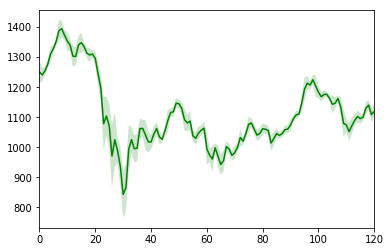

In [73]:
ETH_4h.head()
sns.tsplot([ETH_4h.high, ETH_4h.low], color="green")

In [111]:
ETH_1h_url = 'https://min-api.cryptocompare.com/data/histohour?fsym=ETH&tsym=USD&limit=2160&aggregate=1&e=CCCAGG'
ETH_1h_response = requests.get(ETH_1h_url)
if (ETH_1h_response.status_code == 200):
    ETH_1h = (ETH_1h_response.json())
    
ETH_1h = json_normalize(ETH_1h['Data'])
ETH_1h['time'] = pd.to_datetime(ETH_1h['time'], unit='s')
ETH_1h_noIdenx = ETH_1h.set_index('time')
        

2001

In [112]:
len(ETH_1h)

2001

In [108]:
ETH_1h.head()

,close,high,low,open,time,volumefrom,volumeto
0,304.75,315.44,304.58,313.14,2017-11-10 12:00:00,62095.43,19239828.78
1,307.08,308.68,304.51,304.75,2017-11-10 13:00:00,43522.79,13325385.34
2,304.11,307.40,304.06,307.08,2017-11-10 14:00:00,32711.60,10004480.62
3,303.84,305.22,303.03,304.11,2017-11-10 15:00:00,35898.49,10905053.84
4,304.20,304.79,303.63,303.87,2017-11-10 16:00:00,30678.03,9333547.12


Messing around based on: https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [149]:


ETH_1h['close'].head()

0    304.20
1    301.15
2    291.76
3    297.44
4    293.98
Name: close, dtype: float64

In [164]:
close = ETH_1h['close'].as_matrix()
type(close)

numpy.ndarray

In [165]:
n = close.shape[0]
n

2001

In [166]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n

data_train = close[np.arange(train_start, train_end)]
data_test = close[np.arange(test_start, test_end)]

In [167]:
data_test

array([1031.26, 1049.93, 1155.01, 1113.22, 1054.61, 1097.1 , 1144.66,
       1113.51, 1030.47, 1045.18, 1061.35, 1003.25,  939.07, 1023.92,
       1050.26,  997.46, 1028.47,  979.55,  981.69,  989.09,  987.73,
       1007.83, 1001.01,  976.82,  930.72,  881.4 ,  880.56,  889.39,
        850.42,  785.53,  790.06,  914.02,  885.42,  848.91,  926.15,
        993.27, 1047.47,  999.19, 1024.69, 1018.74, 1047.71, 1067.29,
       1013.84,  987.29,  987.05, 1005.06,  951.33,  974.96, 1001.99,
       1009.27, 1032.17, 1042.84, 1056.88, 1081.11, 1091.18, 1067.  ,
       1038.54, 1065.9 , 1074.15, 1079.08, 1049.47, 1016.26, 1012.97,
       1043.26, 1038.68,  994.88, 1005.06, 1018.09, 1024.73, 1029.14,
       1021.58, 1057.95, 1050.17, 1070.36, 1050.17, 1082.67, 1070.17,
       1050.76, 1044.02, 1053.71, 1027.91, 1027.83, 1023.58, 1031.19,
       1020.45, 1018.71, 1037.36, 1044.19, 1059.15, 1063.98, 1065.92,
       1089.64, 1119.23, 1106.77, 1119.33, 1127.54, 1114.5 , 1121.15,
       1101.99, 1117

In [168]:
data_train

array([ 304.2 ,  301.15,  291.76, ..., 1234.15, 1227.06, 1152.73])

In [157]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit([data_train])
data_train = scaler.transform([data_train])
data_test = scaler.transform([data_test])
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

ValueError: operands could not be broadcast together with shapes (1,400) (1600,) (1,400) 

In [179]:
data = pd.read_csv('01_data/data_stocks.csv')

In [180]:
data = data.drop(['DATE'], 1)
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [177]:
ETH_1h = ETH_1h.drop(['time'], 1)
ETH_1h.head()

,close,high,low,open,volumefrom,volumeto
0,304.20,304.79,303.63,303.87,30678.03,9333547.12
1,301.15,304.28,298.66,304.20,56902.71,17110961.07
2,291.76,301.15,291.76,301.15,85355.26,25141619.53
3,297.44,297.49,288.96,291.76,82481.87,24241162.58
4,293.98,297.62,293.34,297.44,40455.47,11934552.42


In [181]:
# Dimensions of dataset
n = ETH_1h.shape[0]
p = ETH_1h.shape[1]

# Make data a np.array
ETH_1h = ETH_1h.values

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = ETH_1h[np.arange(train_start, train_end), :]
data_test = ETH_1h[np.arange(test_start, test_end), :]

In [169]:
# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a np.array
data = data.values

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

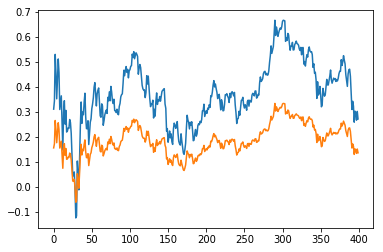

MSE Train:  0.107969955
MSE Test:  0.100862406


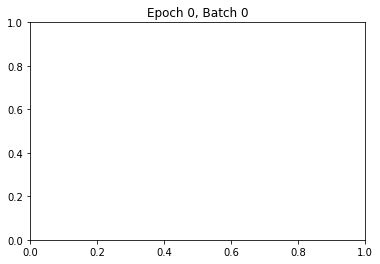

MSE Train:  0.011014099
MSE Test:  0.023442306


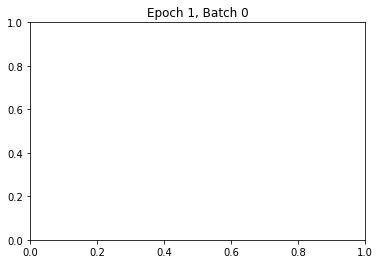

MSE Train:  0.0028845936
MSE Test:  0.0013981569


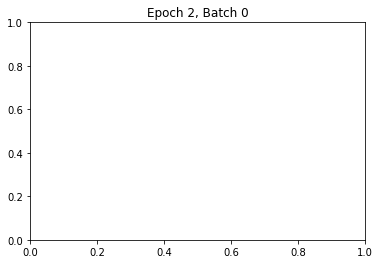

MSE Train:  0.0031172452
MSE Test:  0.008736099


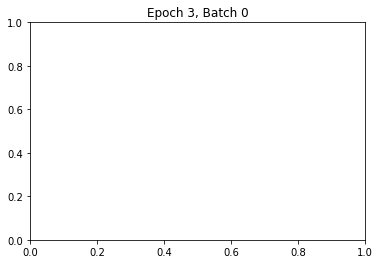

MSE Train:  0.0021167023
MSE Test:  0.0016595599


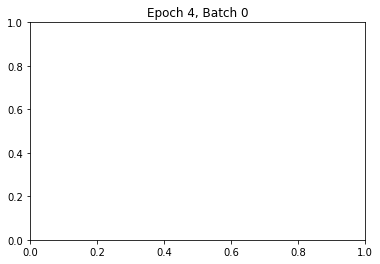

MSE Train:  0.0006835477
MSE Test:  0.0022483424


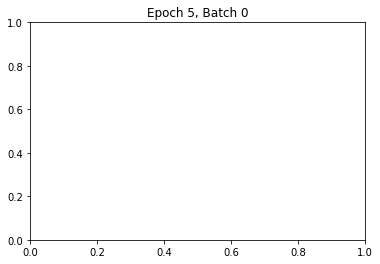

MSE Train:  0.00043884173
MSE Test:  0.0009851942


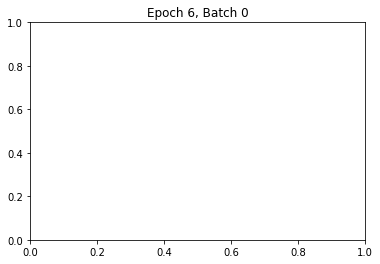

MSE Train:  0.00044701944
MSE Test:  0.001177247


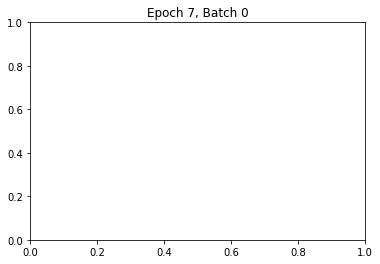

MSE Train:  0.00036544327
MSE Test:  0.00071742537


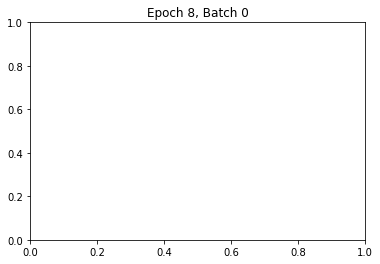

MSE Train:  0.0003014263
MSE Test:  0.000944579


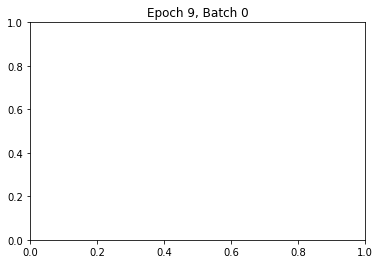

In [186]:
# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Number of stocks in training data
n_stocks = X_train.shape[1]

# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)